In [1]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.11.6 torch-2.1.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Setup complete ✅ (12 CPUs, 11.7 GB RAM, 11.7/19.5 GB disk)


In [1]:
from pathlib import Path

In [4]:
model = YOLO("models/best_openvino_modelX", task="detect")

In [5]:
p = Path(r"G:\My Drive\dataset\normal-4\train\labels\frame-n4-041.txt")
img = Path(*p.parts[:-2], "images", p.stem + ".jpg")
res = model(img)[0]


Loading models\best_openvino_modelX for OpenVINO inference...

image 1/1 G:\My Drive\dataset\normal-4\train\images\frame-n4-041.jpg: 640x640 1 motor, 95.3ms
Speed: 88.2ms preprocess, 95.3ms inference, 112.2ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'motor'}
obb: None
orig_img: array([[[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [58, 59, 57],
        [57, 58, 56],
        [57, 58, 56]],

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [58, 59, 57],
        [57, 58, 56],
        [57, 58, 56]],

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [57, 58, 56],
        [56, 57, 55],
        [56, 57, 55]],

       ...,

       [[18, 23, 22],
        [19, 24, 23],
        [20, 25, 24],
        ...,
        [17, 21, 22],
        [20, 24, 25],
        [19, 23, 24]],

       [[17, 22, 21],
        [18, 23, 22],
        [20, 25, 24],
        ...,
        [32, 36, 37],
        [32, 36, 37],
        [31, 35, 36]],

       [[17, 22, 21],
        [18, 23, 22],
        [19, 24, 23],
        ...

In [15]:
res

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'motor'}
obb: None
orig_img: array([[[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [58, 59, 57],
        [57, 58, 56],
        [57, 58, 56]],

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [58, 59, 57],
        [57, 58, 56],
        [57, 58, 56]],

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [57, 58, 56],
        [56, 57, 55],
        [56, 57, 55]],

       ...,

       [[18, 23, 22],
        [19, 24, 23],
        [20, 25, 24],
        ...,
        [17, 21, 22],
        [20, 24, 25],
        [19, 23, 24]],

       [[17, 22, 21],
        [18, 23, 22],
        [20, 25, 24],
        ...,
        [32, 36, 37],
        [32, 36, 37],
        [31, 35, 36]],

       [[17, 22, 21],
        [18, 23, 22],
        [19, 24, 23],
        ...

In [18]:
import cv2
# res.plot()
cv2.imshow("res", cv2.imread(str(img)))
cv2.getWindowImageRect("res")

(86, 109, 640, 360)

In [35]:
model.model.names

AttributeError: 'str' object has no attribute 'names'

In [5]:
res = model(r"G:\My Drive\dataset\geng-1\train\images\img_01.jpg")[0]

Loading best_openvino_modelX for OpenVINO inference...

image 1/1 G:\My Drive\dataset\geng-1\train\images\img_01.jpg: 640x640 18 motors, 194.5ms
Speed: 49.0ms preprocess, 194.5ms inference, 56.9ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
Path(res.path).name

'img_01.jpg'

In [16]:
res.save_txt("tes.txt")

In [18]:
missing_labels_file = Path("missing-labels.txt")
missing_labels = missing_labels_file.read_text().splitlines()

for label in missing_labels:
    label = Path(label)
    image = Path(*label.parts[:-2], "images", label.stem+".jpg")
    print(image)
    result = model(image)[0]
    result.save_txt(label)

G:\My Drive\dataset\normal-4\train\images\frame-n4-033.jpg



image 1/1 G:\My Drive\dataset\normal-4\train\images\frame-n4-033.jpg: 640x640 (no detections), 26.5ms
Speed: 6.0ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
G:\My Drive\dataset\normal-4\train\images\frame-n4-034.jpg

image 1/1 G:\My Drive\dataset\normal-4\train\images\frame-n4-034.jpg: 640x640 (no detections), 23.0ms
Speed: 2.1ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
G:\My Drive\dataset\normal-4\train\images\frame-n4-035.jpg

image 1/1 G:\My Drive\dataset\normal-4\train\images\frame-n4-035.jpg: 640x640 (no detections), 15.1ms
Speed: 6.1ms preprocess, 15.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
G:\My Drive\dataset\normal-4\train\images\frame-n4-039.jpg

image 1/1 G:\My Drive\dataset\normal-4\train\images\frame-n4-039.jpg: 640x640 (no detections), 17.1ms
Speed: 4.0ms preprocess, 17.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
G:\My Drive\dataset\norm

KeyboardInterrupt: 

In [19]:
for label in missing_labels:
    if Path(label).exists():
        print(label)

G:\My Drive\dataset\normal-4\train\labels\frame-n4-040.txt
G:\My Drive\dataset\normal-4\train\labels\frame-n4-041.txt


In [8]:
video_path = Path(r"G:\My Drive\dataset\video\normal-7.1.mp4")
global_dataset_path = video_path.parents[1]
dataset_path = global_dataset_path / video_path.stem
for mode in ("train", "val"):
    image_path = dataset_path / mode / "images"
    label_path = dataset_path / mode / "labels"
    image_path.mkdir(parents=True, exist_ok=True)
    print(image_path, "created")
    label_path.mkdir(parents=True, exist_ok=True)
    print(label_path, "created")


G:\My Drive\dataset\normal-7.1\train\images created
G:\My Drive\dataset\normal-7.1\train\labels created
G:\My Drive\dataset\normal-7.1\val\images created
G:\My Drive\dataset\normal-7.1\val\labels created


In [98]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"G:\My Drive\centroset\set30.5\normal-5-s0-1.csv", index_col=0)
df

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x69,y69,x70,y70,x72,y72,x74,y74,x75,y75
0,0.286731,0.814899,0.378038,0.650482,0.736502,0.366283,0.750057,0.472706,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
1,0.321926,0.762055,0.000000,0.000000,0.737873,0.388878,0.000000,0.000000,0.639696,0.578560,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
2,0.357327,0.699703,0.000000,0.000000,0.739407,0.413553,0.000000,0.000000,0.627342,0.665646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
3,0.387910,0.646444,0.000000,0.000000,0.741382,0.438977,0.000000,0.000000,0.615765,0.756207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.744213,0.467230,0.000000,0.000000,0.595290,0.886621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.745166,0.499853,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.747182,0.581674,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.744329,0.635428,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.737960,0.704941,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


In [62]:
df.shape

(30, 14)

In [63]:
for i in range(0, df.shape[1], 2):
    
    print(df.iloc[:, i:i+2].columns.values)


['x1' 'y1']
['x2' 'y2']
['x3' 'y3']
['x4' 'y4']
['x5' 'y5']
['x7' 'y7']
['x8' 'y8']


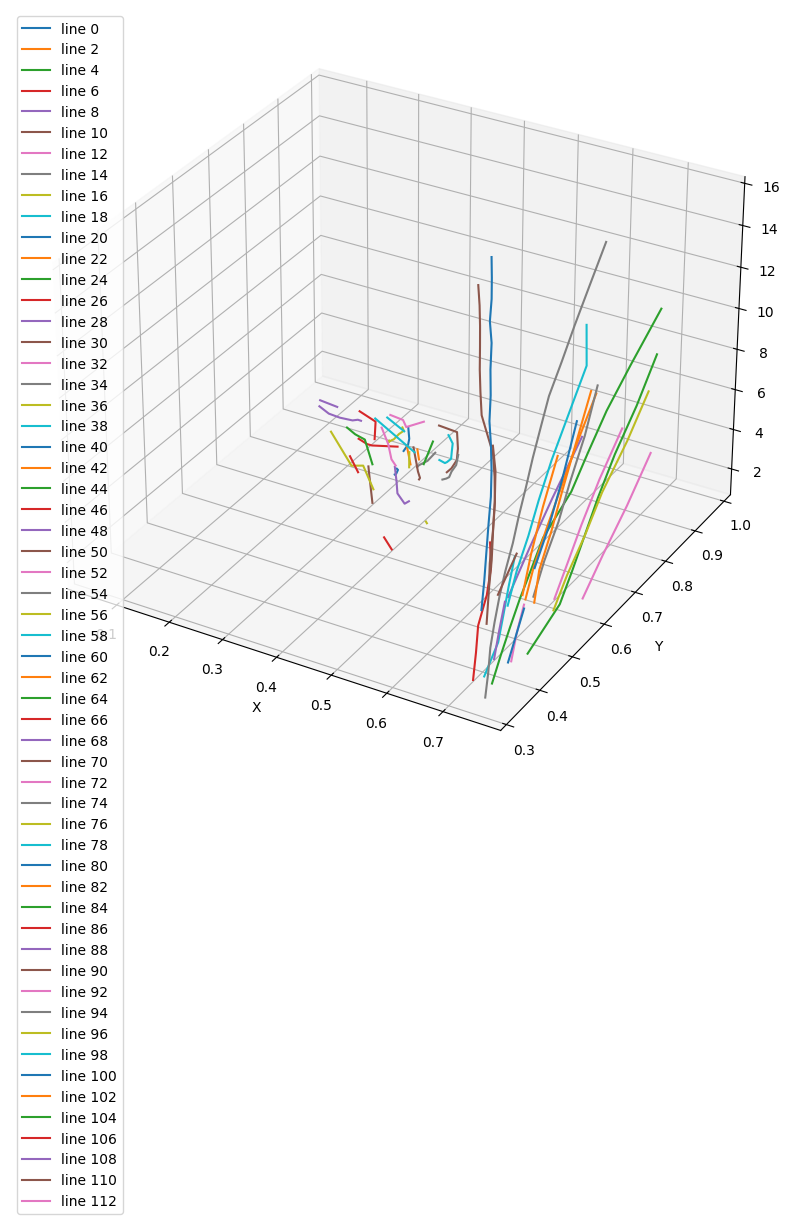

In [99]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')

for i in range(0, df.shape[1], 2):
    points = df.iloc[:, i:i+2].values
    # print(points.columns.values)
    points = points[np.nonzero(points)].reshape((-1,2))
    # Plot the line
    z = np.arange(1, len(points)+1)
    x, y = np.hsplit(points, 2)
    x = np.hstack(x)
    y = np.hstack(y)
    ax.plot3D(x, y, z, label=f"line {i}")

# Add labels
ax.legend(loc='upper left')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [102]:
x=np.random.randint(0, 10, (3,3))
x

array([[5, 2, 1],
       [6, 5, 4],
       [7, 8, 8]])

In [105]:
x[1,1]

5

In [106]:
def row_echelon_form(A, B):
    """
    Utilizes elementary row operations to transform a given set of matrices, 
    which represent the coefficients and constant terms of a linear system, into row echelon form.

    Parameters:
    - A (numpy.array): The input square matrix of coefficients.
    - B (numpy.array): The input column matrix of constant terms

    Returns:
    numpy.array: A new augmented matrix in row echelon form with pivots as 1.
    """
    
    # Before any computation, check if matrix A (coefficient matrix) has non-zero determinant. 
    # It will be used the numpy sub library np.linalg to compute it.

    det_A = np.linalg.det(A)

    # Returns "Singular system" if determinant is zero
    if np.isclose(det_A, 0) == True:
        return 'Singular system'

    # Make copies of the input matrices to avoid modifying the originals
    A = A.copy()
    B = B.copy()


    # Convert matrices to float to prevent integer division
    A = A.astype('float64')
    B = B.astype('float64')

    # Number of rows in the coefficient matrix
    num_rows = len(A) 

    ### START CODE HERE ###

    # Transform matrices A and B into the augmented matrix M
    M = augmented_matrix(A, B)
    
    # Iterate over the rows.
    for row in range(num_rows):

        # The first pivot candidate is always in the main diagonal, let's get it. 
        # Remember that the diagonal elements in a matrix has the same index for row and column. 
        # You may access a matrix value by typing M[row, column]. In this case, column = None
        pivot_candidate = M[row, row]

        # If pivot_candidate is zero, it cannot be a pivot for this row. 
        # So the first step you need to take is to look at the rows below it to check if there is a non-zero element in the same column.
        # The usage of np.isclose is a good practice when comparing two floats.
        if np.isclose(pivot_candidate, 0) == True: 
            # Get the index of the first non-zero value below the pivot_candidate. 
            first_non_zero_value_below_pivot_candidate = get_index_first_non_zero_value_from_column(M, row, row) 

            # Swap rows
            M = swap_rows(M, row, first_non_zero_value_below_pivot_candidate) 

            # Get the pivot, which is in the main diagonal now 
            pivot = M[row,row] 
        
        # If pivot_candidate is already non-zero, then it is the pivot for this row
        else:
            pivot = pivot_candidate 
        
        # Now you are ready to apply the row reduction in every row below the current
            
        # Divide the current row by the pivot, so the new pivot will be 1. You may use the formula current_row -> 1/pivot * current_row
        # Where current_row can be accessed using M[row].
        M[row] = (1/pivot) * M[row]

        # Perform row reduction for rows below the current row
        for j in range(row + 1, num_rows): 
            # Get the value in the row that is below the pivot value. 
            # Remember that, since you are dealing only with non-singular matrices, the pivot is in the main diagonal.
            # Therefore, the values in row j that are below the pivot, must have column index the same index as the column index for the pivot.
            value_below_pivot = M[j,j]
            
            # Perform row reduction using the formula:
            # row_to_reduce -> row_to_reduce - value_below_pivot * pivot_row
            M[j] = M[j] - value_below_pivot*M[None]
            
    ### END CODE HERE ###

    return M
            

In [107]:
A = np.array([[1,2,3],[0,1,0], [0,0,5]])
B = np.array([[1], [2], [4]])
row_echelon_form(A,B)

NameError: name 'augmented_matrix' is not defined

In [5]:
import csv, numpy as np

with open("empty.csv") as f:
    reader = csv.reader(f)
    header = next(reader)
    print("head", header)
    for row in reader:
        # print(row[0], row[1:])
        arr = np.array(row[1:], dtype=float)
        print(arr)

head ['label', 'f1', 'f2']
[1. 2.]


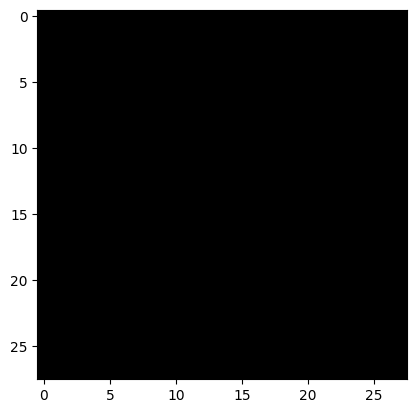

In [26]:
import matplotlib.pyplot as plt
arr = np.random.randint(0, 1, (784,))
img = np.reshape(arr, (28, 28))
plt.imshow(img, cmap="gray")

In [30]:
np.expand_dims(img, axis=-1).shape

(28, 28, 1)

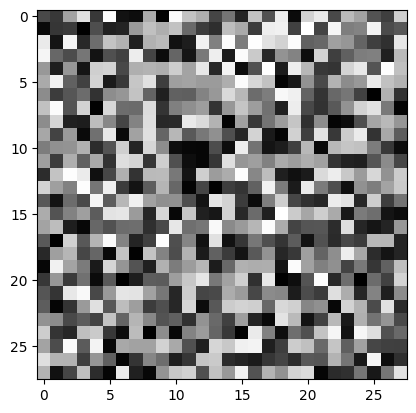

In [11]:
# one hot encoding using numpy only
